In [1]:
import sys
sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

from src.ksd.ksd import KSD
from src.ksd.kernel import IMQ, RBF, Linear

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, trange
import pickle

import high_dim_power as hd

import matplotlib as mpl
mpl.rcParams["mathtext.fontset"] = "cm"

In [3]:
tf.random.set_seed(1)

DELTA_KSD = 2.
DELTA_MMD = 10.

BANDWIDTH_POWER = 1.

STATISTIC = "ksd" # "mmd" # 

KERNEL = RBF # Linear # 

DIR = "../res/high_dim"
SUFFIX_KSD = f"delta{DELTA_KSD}_r{BANDWIDTH_POWER}_ksd_RBF"
SUFFIX_MMD = f"delta{DELTA_MMD}_r{BANDWIDTH_POWER}_mmd_Linear"

EXTRA = "" # "_sqrt" # "_quad" #  

In [4]:
# KSD high dim
dims = [2, 4, 25, 50, 100, 250, 500, 1000, 2000]
ns = [50] * len(dims)

# KSD low dim
# dims_ld = [1, 2]
dims_ld = [2, 4, 25, 50, 100, 250, 500, 1000, 2000]
ns_ld = [1000] * len(dims_ld)
# #TODO
# dims_ld = [2, 4, 25, 50, 100] 
# ns_ld = [10000] * len(dims_ld)

# mmd linear
dims_mmd = [2, 4, 25, 50, 100, 250, 500, 1000, 2000]
ns_mmd = [50] * len(dims)

# Load results

In [5]:
# load aKSD RBF nalytical res
res_analytical_save = pd.read_csv(
    f"{DIR}/res_analytical_{SUFFIX_KSD}.csv",
)
res_analytical = res_analytical_save.set_index("dim", drop=False)

In [6]:
# load KSD RBF empirical results
# high dim
stats_res_list = pickle.load(
    open(f"{DIR}/stats_res_rep_{SUFFIX_KSD}.p", "rb"),
)

In [7]:
# load KSD RBF empirical results
# low dim
stats_res_list_ld = pickle.load(
    open(f"{DIR}/stats_res_rep_{SUFFIX_KSD}_ld.p", "rb"),
)

dims_ld = list(stats_res_list_ld[0].keys())

In [8]:
# load MMD analytical res
res_analytical_save_mmd = pd.read_csv(
    f"{DIR}/res_analytical_{SUFFIX_MMD}.csv",
)
res_analytical_mmd = res_analytical_save_mmd.set_index("dim", drop=False)

In [9]:
# load MMD empirical results
stats_res_list_mmd = pickle.load(
    open(f"{DIR}/stats_res_rep_{SUFFIX_MMD}.p", "rb"),
)

dims_mmd = list(stats_res_list_mmd[0].keys())

# Initialise result classes

In [10]:
# high dim
d = 2000
print("dim:", d)
ts = res_analytical.loc[d, "expectation"] * np.linspace(0.25, 1.75, 101)

hd_limits_rep_dims = hd.LimitDistExperimentRepeatedMultiDims(
    empirical_vals_dims_list=stats_res_list,
    res_analytical=res_analytical,
    dims=dims,
    ns=ns,
    ts=ts,
)

dim: 1000


In [11]:
# low dim
d_ld = 2
print("dim:", d_ld)
ts_ld = res_analytical.loc[d_ld, "expectation"] * np.linspace(0.9, 1.1, 101)

hd_limits_rep_dims_ld = hd.LimitDistExperimentRepeatedMultiDims(
    empirical_vals_dims_list=stats_res_list_ld,
    res_analytical=res_analytical,
    dims=dims_ld,
    ns=ns_ld,
    ts=ts_ld,
)

dim: 2


In [12]:
# mmd
d_mmd = 1000
print("dim:", d_mmd)
ts_mmd = res_analytical_mmd.loc[d_mmd, "expectation"] * np.linspace(0.5, 1.5, 101)

hd_limits_rep_dims_mmd = hd.LimitDistExperimentRepeatedMultiDims(
    empirical_vals_dims_list=stats_res_list_mmd,
    res_analytical=res_analytical_mmd,
    dims=dims_mmd,
    ns=ns_mmd,
    ts=ts_mmd,
)

dim: 1000


## Vary both sample size and dim

## CDF

In [13]:
legend_cdf = {
    "probs": "Exceeding prob", 
    "cond": "Classic", 
    "full": "High dim Gaussian",
    "mm_full": "High dim Gamma",
#     "mm_chi": "High dim Chi-square"
#     "mm_chi": "High dim Gamma", #! use chi-sq
}

In [14]:
# compute CDFs
cdf_rep = hd_limits_rep_dims.run(dim=d)
cdf_rep.replace(legend_cdf, inplace=True)

In [15]:
# low dim
# compute CDFs
cdf_rep_ld = hd_limits_rep_dims_ld.run(dim=d_ld)
cdf_rep_ld.replace(legend_cdf, inplace=True)

In [16]:
# mmd
# compute CDFs
cdf_rep_mmd = hd_limits_rep_dims_mmd.run(dim=d_mmd)
cdf_rep_mmd.replace(legend_cdf, inplace=True)

## PDF

In [17]:
legend_pdf = {
    "probs": "Dn", 
    "cond": "Classic", 
    "full": "High dim Gaussian",
    "mm_full": "High dim Gamma",
    "mm_chi": "High dim Chi-square",
}

legend_pdf_mmd = {
    "probs": "Dn", 
    "cond": "Classic", 
    "full": "High dim Gaussian",
    "mm_full": "High dim Gamma",
    "mm_chi": "High dim Chi-square",
#     "mm_chi": "High dim Gamma", #! use chi-sq
}

In [18]:
samples_res = hd_limits_rep_dims.get_exp(d).sample_all_limits(size=1000)
samples_res.replace(legend_pdf, inplace=True)

In [19]:
samples_res_ld = hd_limits_rep_dims_ld.get_exp(d_ld).sample_all_limits(size=1000)
samples_res_ld.replace(legend_pdf, inplace=True)

In [20]:
samples_res_mmd = hd_limits_rep_dims_mmd.get_exp(d_mmd).sample_all_limits(size=1000)
samples_res_mmd.replace(legend_pdf_mmd, inplace=True)

# CDF-PDF plots

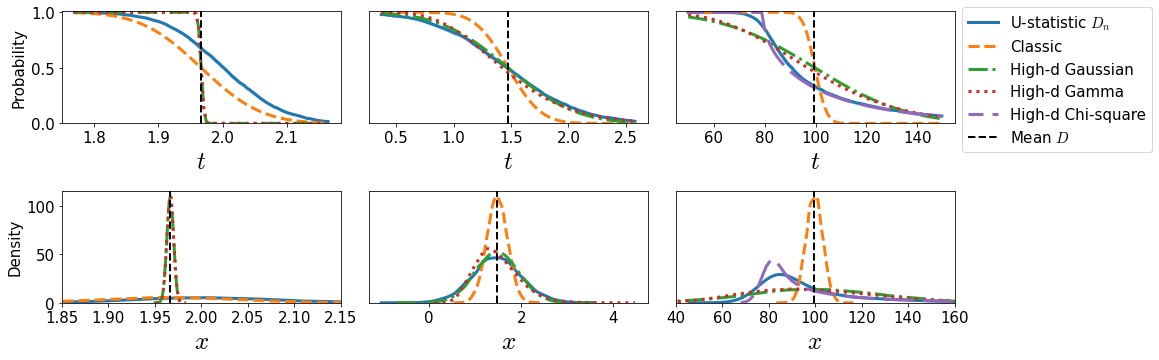

In [83]:
# figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))

# linestyles = ["solid", "dashed", "dashdot", "dotted"]
# lw = 3

# # 1.ecdf plots
# cdf_legends = ["Exceeding prob", "Classic", "High dim Gaussian", "High dim Gamma"]
# cdf_legends_show = [r"U-statistic $D_n$", "Classic", "High-d Gaussian", "High-d Gamma"]

# # i. ksd ld
# for i, n in enumerate(cdf_legends):
#     sns.lineplot(
#         ax=axes[0][0],
#         data=cdf_rep_ld.loc[cdf_rep_ld.name == n], 
#         x="ts", 
#         y="value", 
#         label=cdf_legends_show[i],
#         linestyle=linestyles[i],
#         linewidth=lw,
#     )

# # statistic expectation
# axes[0][0].axvline(
#     res_analytical.loc[d_ld, "expectation"], color="k", linestyle="--", label=r"Mean $D$", linewidth=2,
# )

# axes[0][0].set_xlabel("$t$", fontsize=25)
# axes[0][0].set_ylabel("Probability", fontsize=15)
# axes[0][0].set_ylim(0., 1.01)
# axes[0][0].tick_params(labelsize=15)
# axes[0][0].legend([],[], frameon=False)

# # ii. ksd
# for i, n in enumerate(cdf_legends):
#     sns.lineplot(
#         ax=axes[0][1],
#         data=cdf_rep.loc[cdf_rep.name == n], 
#         x="ts", 
#         y="value", 
#         label=cdf_legends_show[i],
#         linestyle=linestyles[i],
#         linewidth=lw,
#     )
# # statistic expectation
# axes[0][1].axvline(
#     res_analytical.loc[d, "expectation"], color="k", linestyle="--", label=r"Mean $D$", linewidth=2,
# )

# axes[0][1].set_xlabel("$t$", fontsize=25)
# axes[0][1].set_ylim(0., 1.01)
# axes[0][1].tick_params(labelsize=15)
# axes[0][1].get_yaxis().set_visible(False)
# axes[0][1].legend([],[], frameon=False)

# # iii. mmd
# for i, n in enumerate(cdf_legends):
#     sns.lineplot(
#         ax=axes[0][2],
#         data=cdf_rep_mmd.loc[cdf_rep_mmd.name == n], 
#         x="ts", 
#         y="value", 
#         label=cdf_legends_show[i],
#         linestyle=linestyles[i],
#         linewidth=lw,
#     )
    
# sns.lineplot(
#     ax=axes[0][2],
#     data=cdf_rep_mmd.loc[cdf_rep_mmd.name == "High dim Chi-square"], 
#     x="ts", 
#     y="value", 
#     label="High-d Chi-square",
#     linestyle=(5, (10, 3)),
#     linewidth=lw,
# )

# # statistic expectation
# axes[0][2].axvline(
#     res_analytical_mmd.loc[d, "expectation"], color="k", linestyle="--", label=r"Mean $D$", linewidth=2,
# )

# axes[0][2].set_xlabel("$t$", fontsize=25)
# axes[0][2].set_ylim(0., 1.01)
# axes[0][2].tick_params(labelsize=15)
# axes[0][2].get_yaxis().set_visible(False)
# # axes[0][2].legend([],[], frameon=False)

# # 2. density plots
# legend_labels = {
#     "Dn": "$D_n$", "Classic": "Classic", "High dim Gaussian": "High dim Gaussian", 
#     "High dim Gamma": "High dim Gamma",
# }

# # i. ksd ld
# for i, (n, l) in enumerate(legend_labels.items()):
#     sns.kdeplot(
#         ax=axes[1][0],
#         data=samples_res_ld.loc[samples_res_ld.name == n],
#         x="x",
#         linewidth=lw,
#         common_norm=False,
#         label=l,
#         linestyle=linestyles[i],
#         legend=False,
#     )
# # statistic expectation
# axes[1][0].axvline(
#     res_analytical.loc[d_ld, "expectation"], color="k", linestyle="--", label=r"Mean $D$", linewidth=2,
# )
# axes[1][0].set_xlabel("$x$", fontsize=25)
# axes[1][0].set_ylabel("Density", fontsize=15)
# axes[1][0].set_ylim(bottom=0.)
# axes[1][0].tick_params(labelsize=15)
# axes[1][0].set_xlim([1.85, 2.15])

# # ii. ksd
# for i, (n, l) in enumerate(legend_labels.items()):
#     sns.kdeplot(
#         ax=axes[1][1],
#         data=samples_res.loc[samples_res.name == n],
#         x="x",
#         linewidth=lw,
#         linestyle=linestyles[i],
#         common_norm=False,
#         legend=False,
#     )

# # statistic expectation
# axes[1][1].axvline(
#     res_analytical.loc[d, "expectation"], color="k", linestyle="--", label=r"Mean $D$", linewidth=2,
# )
# axes[1][1].set_xlabel("$x$", fontsize=25)
# axes[1][1].get_yaxis().set_visible(False)
# axes[1][1].tick_params(labelsize=15)

# # iii. mmd
# for i, (n, l) in enumerate(legend_labels.items()):
#     sns.kdeplot(
#         ax=axes[1][2],
#         data=samples_res_mmd.loc[samples_res_mmd.name == n],
#         x="x",
#         linewidth=lw,
#         linestyle=linestyles[i],
#         common_norm=False,
#         legend=False,
#     )
   
# sns.kdeplot(
#     ax=axes[1][2],
#     data=samples_res_mmd.loc[samples_res_mmd.name == "High dim Chi-square"],
#     x="x",
#     linewidth=lw,
#     linestyle=(5, (10, 3)),
#     common_norm=False,
#     legend=False,
# )

# # statistic expectation
# axes[1][2].axvline(
#     res_analytical_mmd.loc[d, "expectation"], color="k", linestyle="--", label=r"Mean $D$", linewidth=2,
# )

# axes[1][2].set_xlabel("$x$", fontsize=25)
# axes[1][2].get_yaxis().set_visible(False)
# axes[1][2].tick_params(labelsize=15)
# axes[1][2].set_xlim([40, 160])

# axes[0][2].legend(
# #     cdf_legends_show,
#     fontsize=15, bbox_to_anchor=(1., 1.1), 
# )

# plt.subplots_adjust(
#     top=0.8,
#     wspace=0.1,
#     hspace=0.6,
# )

# # plt.savefig(f"../figs/high_dim/power_ksd_and_mmdLinear.pdf", bbox_inches="tight")

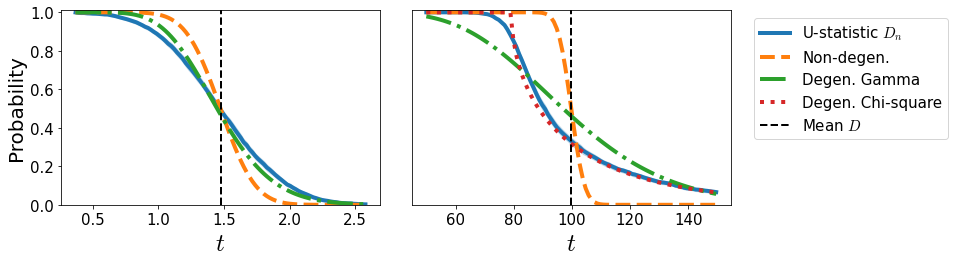

In [21]:
figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

linestyles = ["solid", "dashed", "dashdot", "dotted"]
lw = 4

# 1.ecdf plots
# cdf_legends = ["Exceeding prob", "Classic", "High dim Gaussian", "High dim Gamma"]
# cdf_legends_show = [r"U-statistic $D_n$", "Classic", "High-d Gaussian", "High-d Gamma"]
cdf_legends = ["Exceeding prob", "Classic", "High dim Gamma", "mm_chi"]
cdf_legends_show = [r"U-statistic $D_n$", "Non-degen.", "Degen. Gamma", "Degen. Chi-square"]

# i. ksd high dim
for i, n in enumerate(cdf_legends):
    if n != "mm_chi":
        sns.lineplot(
            ax=axes[0],
            data=cdf_rep.loc[cdf_rep.name == n], 
            x="ts", 
            y="value", 
            label=cdf_legends_show[i],
            linestyle=linestyles[i],
            linewidth=lw,
        )
# statistic expectation
axes[0].axvline(
    res_analytical.loc[d, "expectation"], color="k", linestyle="--", label=r"Mean $D$", linewidth=2,
)

axes[0].set_xlabel("$t$", fontsize=25)
axes[0].set_ylabel("Probability", fontsize=20)
axes[0].set_ylim(0., 1.01)
axes[0].tick_params(labelsize=15)
axes[0].legend([],[], frameon=False)

# ii. mmd linear
for i, n in enumerate(cdf_legends):
    sns.lineplot(
        ax=axes[1],
        data=cdf_rep_mmd.loc[cdf_rep_mmd.name == n], 
        x="ts", 
        y="value", 
        label=cdf_legends_show[i],
        linestyle=linestyles[i],
        linewidth=lw,
    )

# statistic expectation
axes[1].axvline(
    res_analytical_mmd.loc[d, "expectation"], color="k", linestyle="--", label=r"Mean $D$", linewidth=2,
)

axes[1].set_xlabel("$t$", fontsize=25)
axes[1].set_ylim(0., 1.01)
axes[1].tick_params(labelsize=15)
axes[1].get_yaxis().set_visible(False)

axes[1].legend(
#     cdf_legends_show,
    fontsize=15, bbox_to_anchor=(1.05, 1.), 
)

plt.subplots_adjust(
    top=0.8,
    wspace=0.1,
    hspace=0.6,
)

# plt.savefig(f"../figs/high_dim/power_ksd_and_mmdLinear.pdf", bbox_inches="tight")